In [2]:
import boto3
import json
import time
import pandas as pd
import configparser
import s3fs
# Read AWS credentials from config file
config = configparser.ConfigParser()
config.read('aws.cfg')

aws_access_key_id = config['AWS']['aws_access_key_id']
aws_secret_access_key = config['AWS']['aws_secret_access_key']
region_name = config['AWS']['region_name']

In [8]:
s3 =  boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name=region_name
)

In [15]:

review_df = pd.read_csv('s3://techcatalyst-public/resources/sentiment/review.csv')
review_df.head()
product_df.head()

,PRODUCT ID,PRODUCT DESCRIPTION,REVIEW ID
0,1,High-quality smartphone with excellent camera.,R1
1,1,High-quality smartphone with excellent camera.,R2
2,2,Durable laptop with long battery life.,R3
3,2,Durable laptop with long battery life.,R4
4,3,Wireless noise-canceling headphones.,R5


In [18]:
merged_df = pd.merge(product_df, review_df, on='REVIEW ID')

In [4]:
comprehend = boto3.client(service_name='comprehend', region_name='us-west-2', aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

In [19]:
def get_sentiment(mytxt):
     
    response = comprehend.detect_sentiment(
    Text= mytxt,
    LanguageCode='en')
     
    return response['Sentiment']

In [52]:
merged_df['Sentiment'] = merged_df['REVIEW TEXT'].apply(lambda
x
: get_sentiment(
str
(
x
)))

NameError: name 'x' is not defined

In [6]:
bucket_name = 'techcatalyst-public'
dst = f's3://{bucket_name}/smalik/product_sentiment.csv'
merged_df.to_csv(dst, storage_options={'key':aws_access_key_id,'secret':aws_secret_access_key})

NameError: name 'merged_df' is not defined

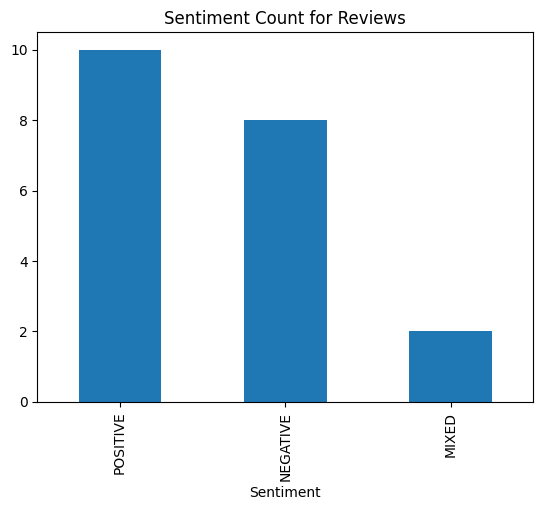

In [39]:
ax = merged_df.Sentiment.value_counts().plot(kind='bar')
plt.title("Sentiment Count for Reviews")
plt.savefig('sentiment_analysis.jpg', format='jpg')

In [57]:

filename = 'sentiment_analysis.jpg'
key = 'smalik/sentiment_analysis.jpg'
with open(filename, 'rb') as file_obj:
    s3.upload_fileobj(file_obj, bucket_name, key)
 


In [31]:
rekognition = boto3.client(service_name='rekognition', region_name='us-west-2', aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

In [40]:
states = pd.read_csv(f's3://{bucket_name}/resources/license-plates/states.csv')
states_list = states['0'].to_list()

In [44]:
response = s3.list_objects_v2(Bucket = bucket, Prefix = prefix)
documents = [item['Key'] for item in response.get('Contents',[])]

documents.pop(0)
documents.pop(-1)

for doc in documents:
    response = rekognition.detect_text(
        Image={'S3Object': {'Bucket':bucket, 'Name': doc}} 
    )
    detected_text = [text_detection['DetectedText'] for text_detection in response['TextDetections']]

    matched_states = [state.lower() for state in states_list if state in ' '.join(detected_text)]
    display(matched_states)



[]

[]

[]

[]

['massachusetts']

[]

['california']

['nevada']

['oh']

[]

In [50]:
bucket_name = 'techcatalyst-public'
dst = f's3://{bucket_name}/smalik/license_states.csv'
s3.put_object(
    Body="\n".join(matched_states),
    Key=dst,
    Bucket=bucket_name,
)

{'ResponseMetadata': {'RequestId': 'S306K3J9SAC2HN2R',
  'HostId': 'e1t/D58CmSCdbiVW+ynxjtv7BYEd5N2tEItMSFPumu5Z0IHaiMA4E3p2TvO6Kq94oNEOojAUC1PDgro1isQ8pw==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'e1t/D58CmSCdbiVW+ynxjtv7BYEd5N2tEItMSFPumu5Z0IHaiMA4E3p2TvO6Kq94oNEOojAUC1PDgro1isQ8pw==',
   'x-amz-request-id': 'S306K3J9SAC2HN2R',
   'date': 'Fri, 26 Jul 2024 13:23:01 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"d41d8cd98f00b204e9800998ecf8427e"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"d41d8cd98f00b204e9800998ecf8427e"',
 'ServerSideEncryption': 'AES256'}